# Loading/Rescaling Image Data

## Perform standard imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from PIL import Image
from IPython.display import display

## Create a DataFrame

#### Create a list of image filenames

#### Create a DataFrame of image sizes (width x height)
It's worth noting that <tt>Image.open()</tt> doesn't read the entire image into memory, so it's a reasonable way to get image sizes. Still, this can take awhile.

In [3]:
path = './Datasets/BSD500_COCO1000_train_val/train/'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+img)
        
print('Images: ',len(img_names))

Images:  2265


In [4]:
# Start by creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  2265
Rejects: 0


In [5]:
# Convert the list to a DataFrame
df = pd.DataFrame(img_sizes)

# Run summary statistics on image widths
df[0].describe()

count    2265.000000
mean      552.931567
std       105.368385
min       319.000000
25%       481.000000
50%       640.000000
75%       640.000000
max       640.000000
Name: 0, dtype: float64

In [6]:
# Run summary statistics on image heights
df[1].describe()

count    2265.000000
mean      465.300221
std       100.280322
min       256.000000
25%       424.000000
50%       480.000000
75%       482.000000
max       640.000000
Name: 1, dtype: float64

## Image Pre-processing
Transformation of one image

In [7]:
surf = Image.open(img_names[12])
print(surf)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7F9FDF763278>


In [8]:
r, g, b = surf.getpixel((0, 0))
print(r,g,b)

98 69 65


torch.Size([3, 375, 500])


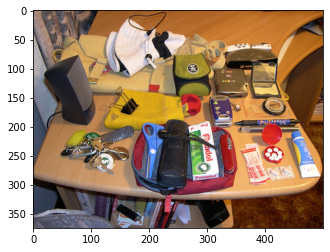

In [9]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(surf)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [11]:
color = ('b','g','r')
liste_histr = []
nx = 200

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img = cv.imread(folder+img,cv.IMREAD_COLOR)
        # Etape 1 : obtenir l'histogramme
        for i,col in enumerate(color):
            histr = cv.calcHist([img],[i],None,[256],[0,256]).squeeze()
            # Savitzky-Golay
            y = savgol_filter(histr, 21, 5)
            # interpolation pour nx points
            x = np.linspace(0,1,256, endpoint=True)
            xp = np.linspace(0,1,nx,endpoint=True)
            f = interp1d(x,y)
            yp = f(xp)
            # normalisation
            yp = yp/np.linalg.norm(yp)
            # enregistrement
            liste_histr.append(yp)

In [15]:
len(liste_histr)

6795

In [12]:
np.savetxt('data_lisse.csv', liste_histr, delimiter=', ', fmt='%12.8f')

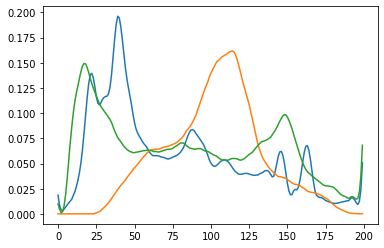

In [13]:
plt.plot(liste_histr[2])
plt.plot(liste_histr[200])
plt.plot(liste_histr[2000])